In [1]:
import sys
sys.path.append("..")
import numpy as np
from generate_corr_sequence import gen_corr_sequence, debugPlots

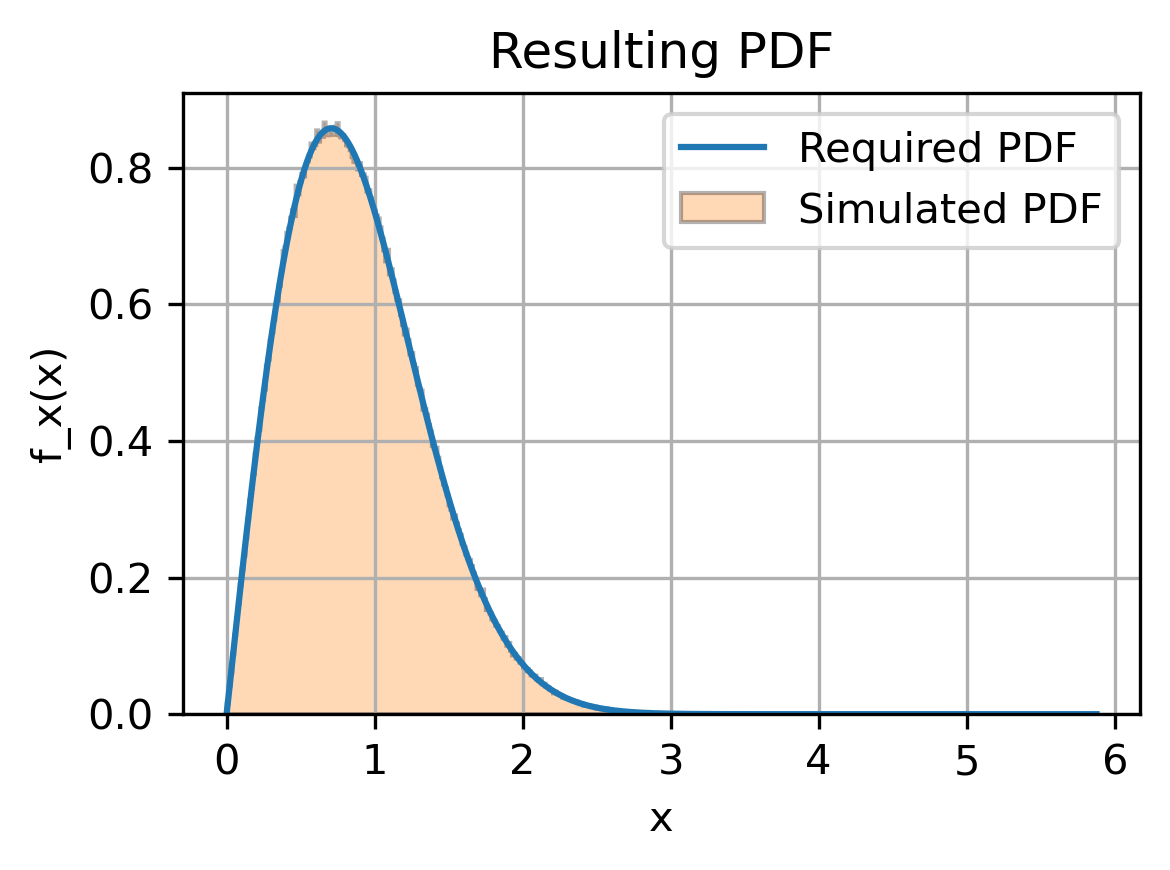

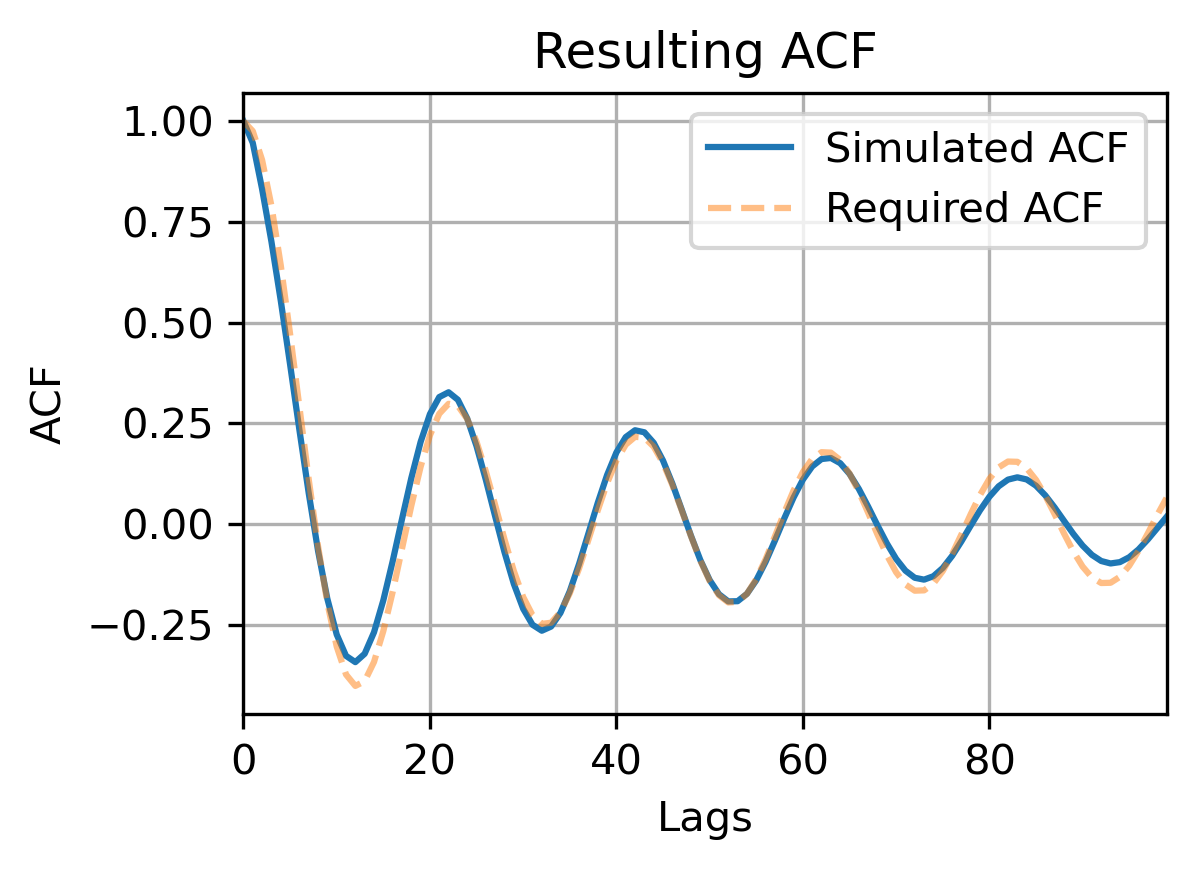

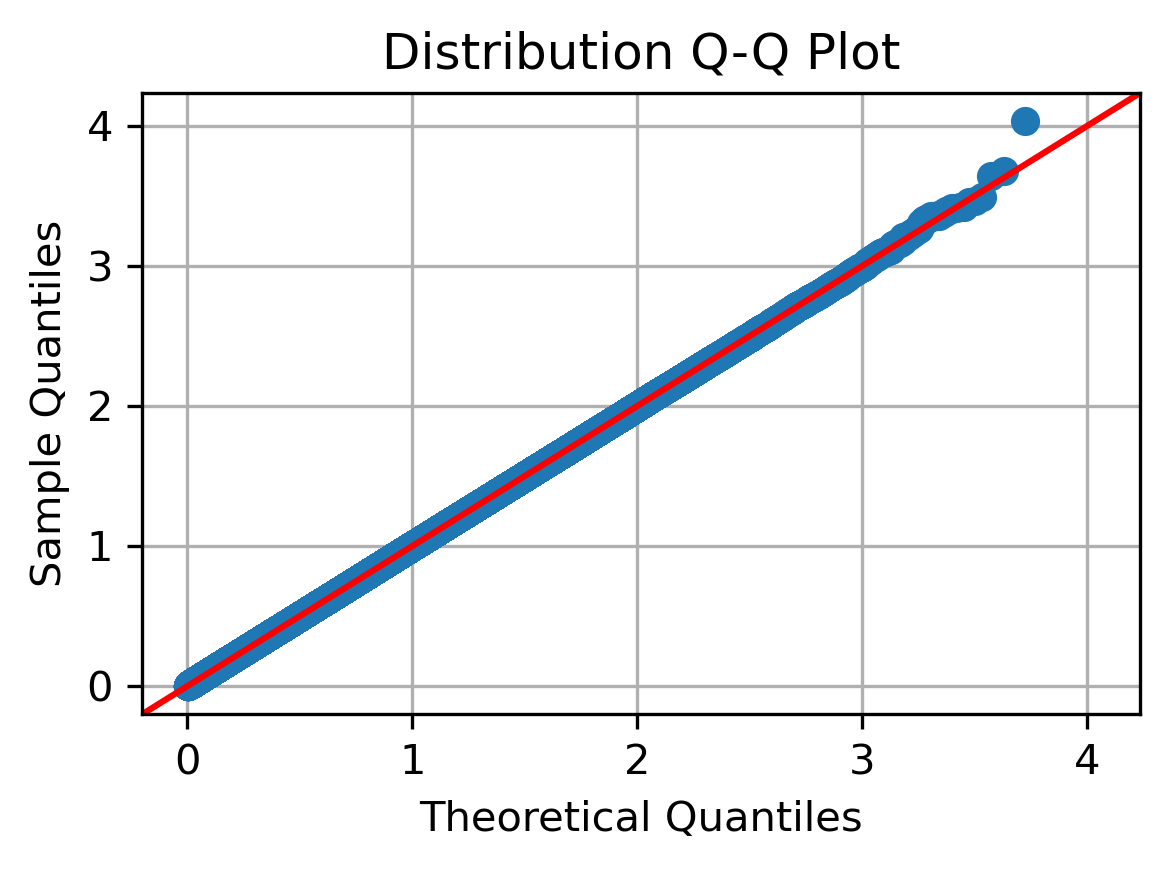

In [2]:
from scipy.stats import nakagami
from scipy.special import j0

m = np.arange(0, 100)
targetACF = np.array(j0(0.1 * np.pi * abs(m)))
signal = gen_corr_sequence(
    dist_obj=nakagami(nu=1),
    desiredACF=np.array(j0(0.1 * np.pi * abs(m))),
    debug=True, plot_figures_name='nakagami')

### Repeatability of the generated sequence ACF
Takes a long time to run (about 30 seconds on my computer)

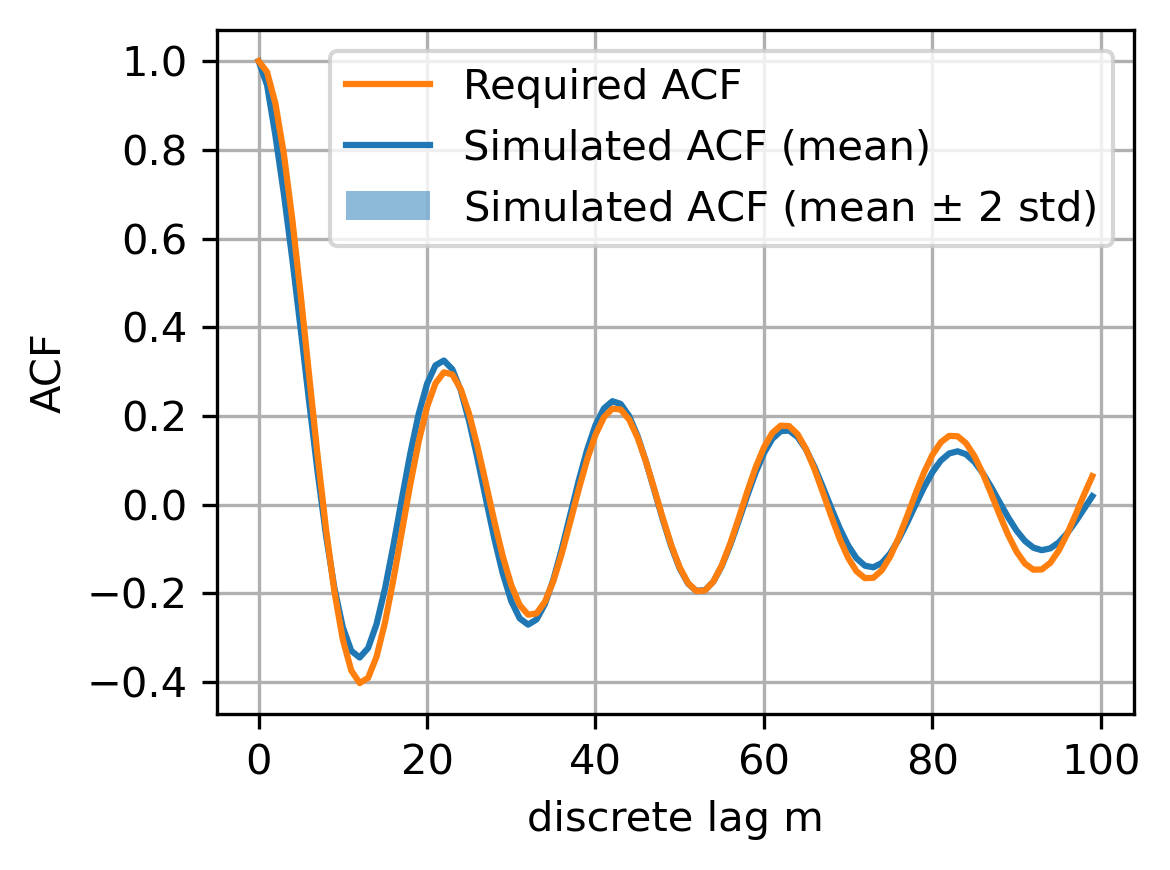

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

acf = np.zeros((10, len(targetACF)))
for i in range(10):
    signal = gen_corr_sequence(
        dist_obj=nakagami(nu=1),
        desiredACF=targetACF,
        debug=False)
    acf[i, :] = sm.tsa.acf(signal, nlags = len(targetACF)-1, fft = True)

plt.plot(np.mean(acf, axis=0), label='Simulated ACF (mean)')
plt.plot(targetACF, label='Required ACF')
std = np.std(acf,axis=0)
plt.fill_between(np.arange(len(targetACF)),
                 np.mean(acf, axis=0) - std*2, np.mean(acf, axis=0) + std*2,
                 alpha=0.5,
                 label='Simulated ACF (mean $\pm$ 2 std)')
# Change legend order: https://www.statology.org/matplotlib-legend-order/
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.grid()
plt.xlabel('discrete lag m')
plt.ylabel('ACF')
plt.tight_layout()
plt.savefig('nakagami_acf_20.png', dpi=300)
plt.show()